## 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## 2: Load Dataset

In [2]:
data_path = 'MLR2 .csv'
data = pd.read_csv(data_path)


print(data.head())
print(data.info())  


   Year  PerFemEmploy FertilityRate  Ratio_MaletoFemale  PerFemEmployers  \
0  1995         24.30          3.71               28.33              0.1   
1  1996         24.57          3.59               28.72              0.1   
2  1997         24.82          3.48               29.18              0.1   
3  1998         25.11          3.37               29.67              0.1   
4  1999         25.38          3.27               30.17              0.1   

   Agriculture  Industry  Services  Wage&Salaried  ContrFamWorkers  \
0        84.79      7.66      7.56          18.03            66.80   
1        82.28      7.46     10.27          18.38            66.39   
2        81.19      7.57     11.24          18.74            65.95   
3        80.28      7.77     11.95          19.11            65.53   
4        79.52      8.12     12.36          19.50            65.01   

   OwnAccount  Vulnerable  
0       15.07       81.87  
1       15.14       81.52  
2       15.21       81.16  
3       15

## 2: Cleaning Dataset

In [3]:
print("Initial Null Values:")
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

# Handle missing values for numeric columns (if any exist)
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col] = data[col].fillna(data[col].mean())

print("Null values after cleaning:")
print(data.isnull().sum())

Initial Null Values:
Year                  0
PerFemEmploy          0
FertilityRate         0
Ratio_MaletoFemale    0
PerFemEmployers       0
Agriculture           0
Industry              0
Services              0
Wage&Salaried         0
ContrFamWorkers       0
OwnAccount            0
Vulnerable            0
dtype: int64
Null values after cleaning:
Year                  0
PerFemEmploy          0
FertilityRate         0
Ratio_MaletoFemale    0
PerFemEmployers       0
Agriculture           0
Industry              0
Services              0
Wage&Salaried         0
ContrFamWorkers       0
OwnAccount            0
Vulnerable            0
dtype: int64


In [13]:
data['Year'] = data['Year'].astype(int)
data['Ratio_MaletoFemale'] = data['Ratio_MaletoFemale'].astype(float)

In [14]:
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.strip()


In [15]:
print("Number of duplicate rows:", data.duplicated().sum())

data = data.drop_duplicates()

Number of duplicate rows: 0


## 3: Exploratory Data Analysis (EDA)

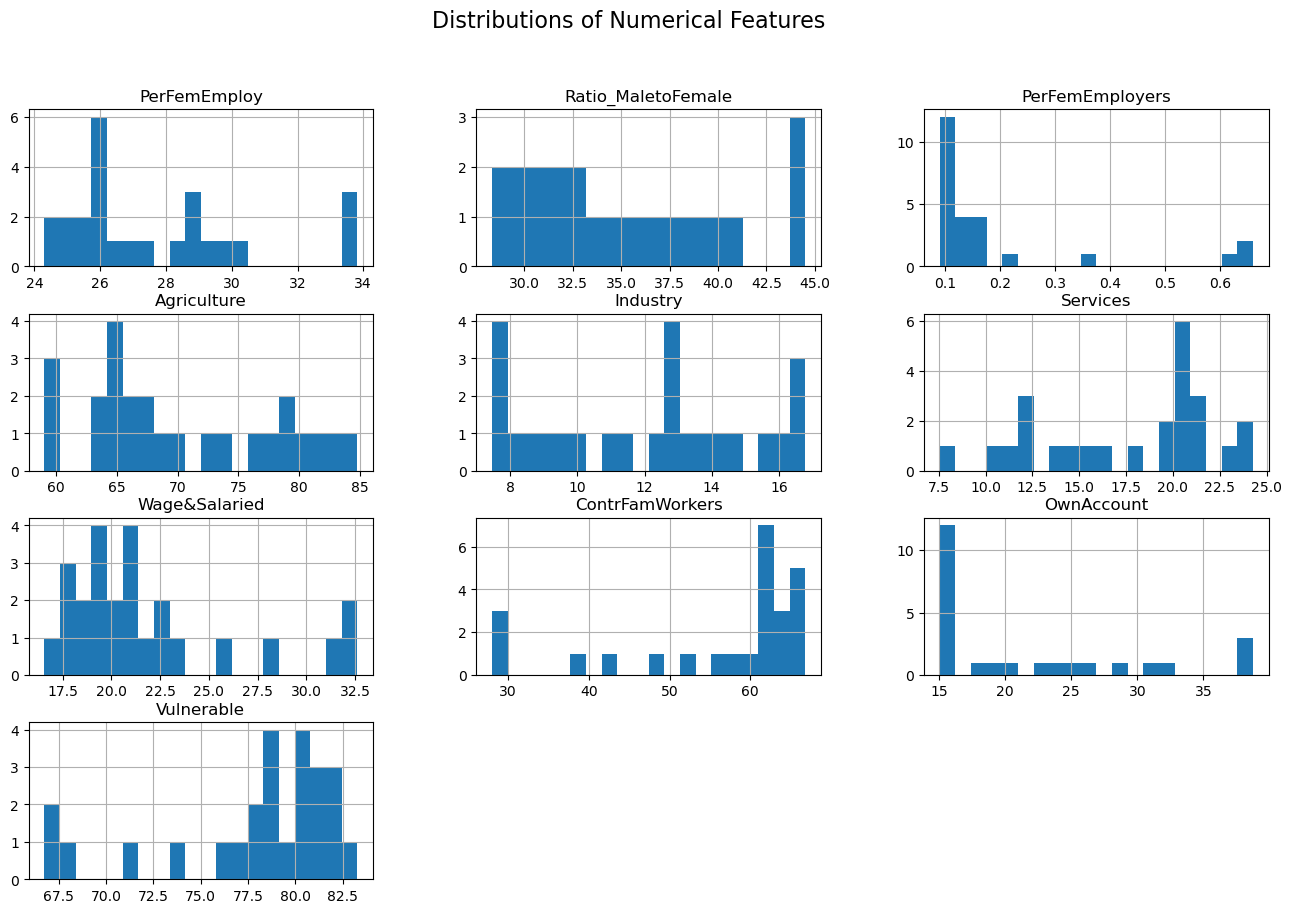

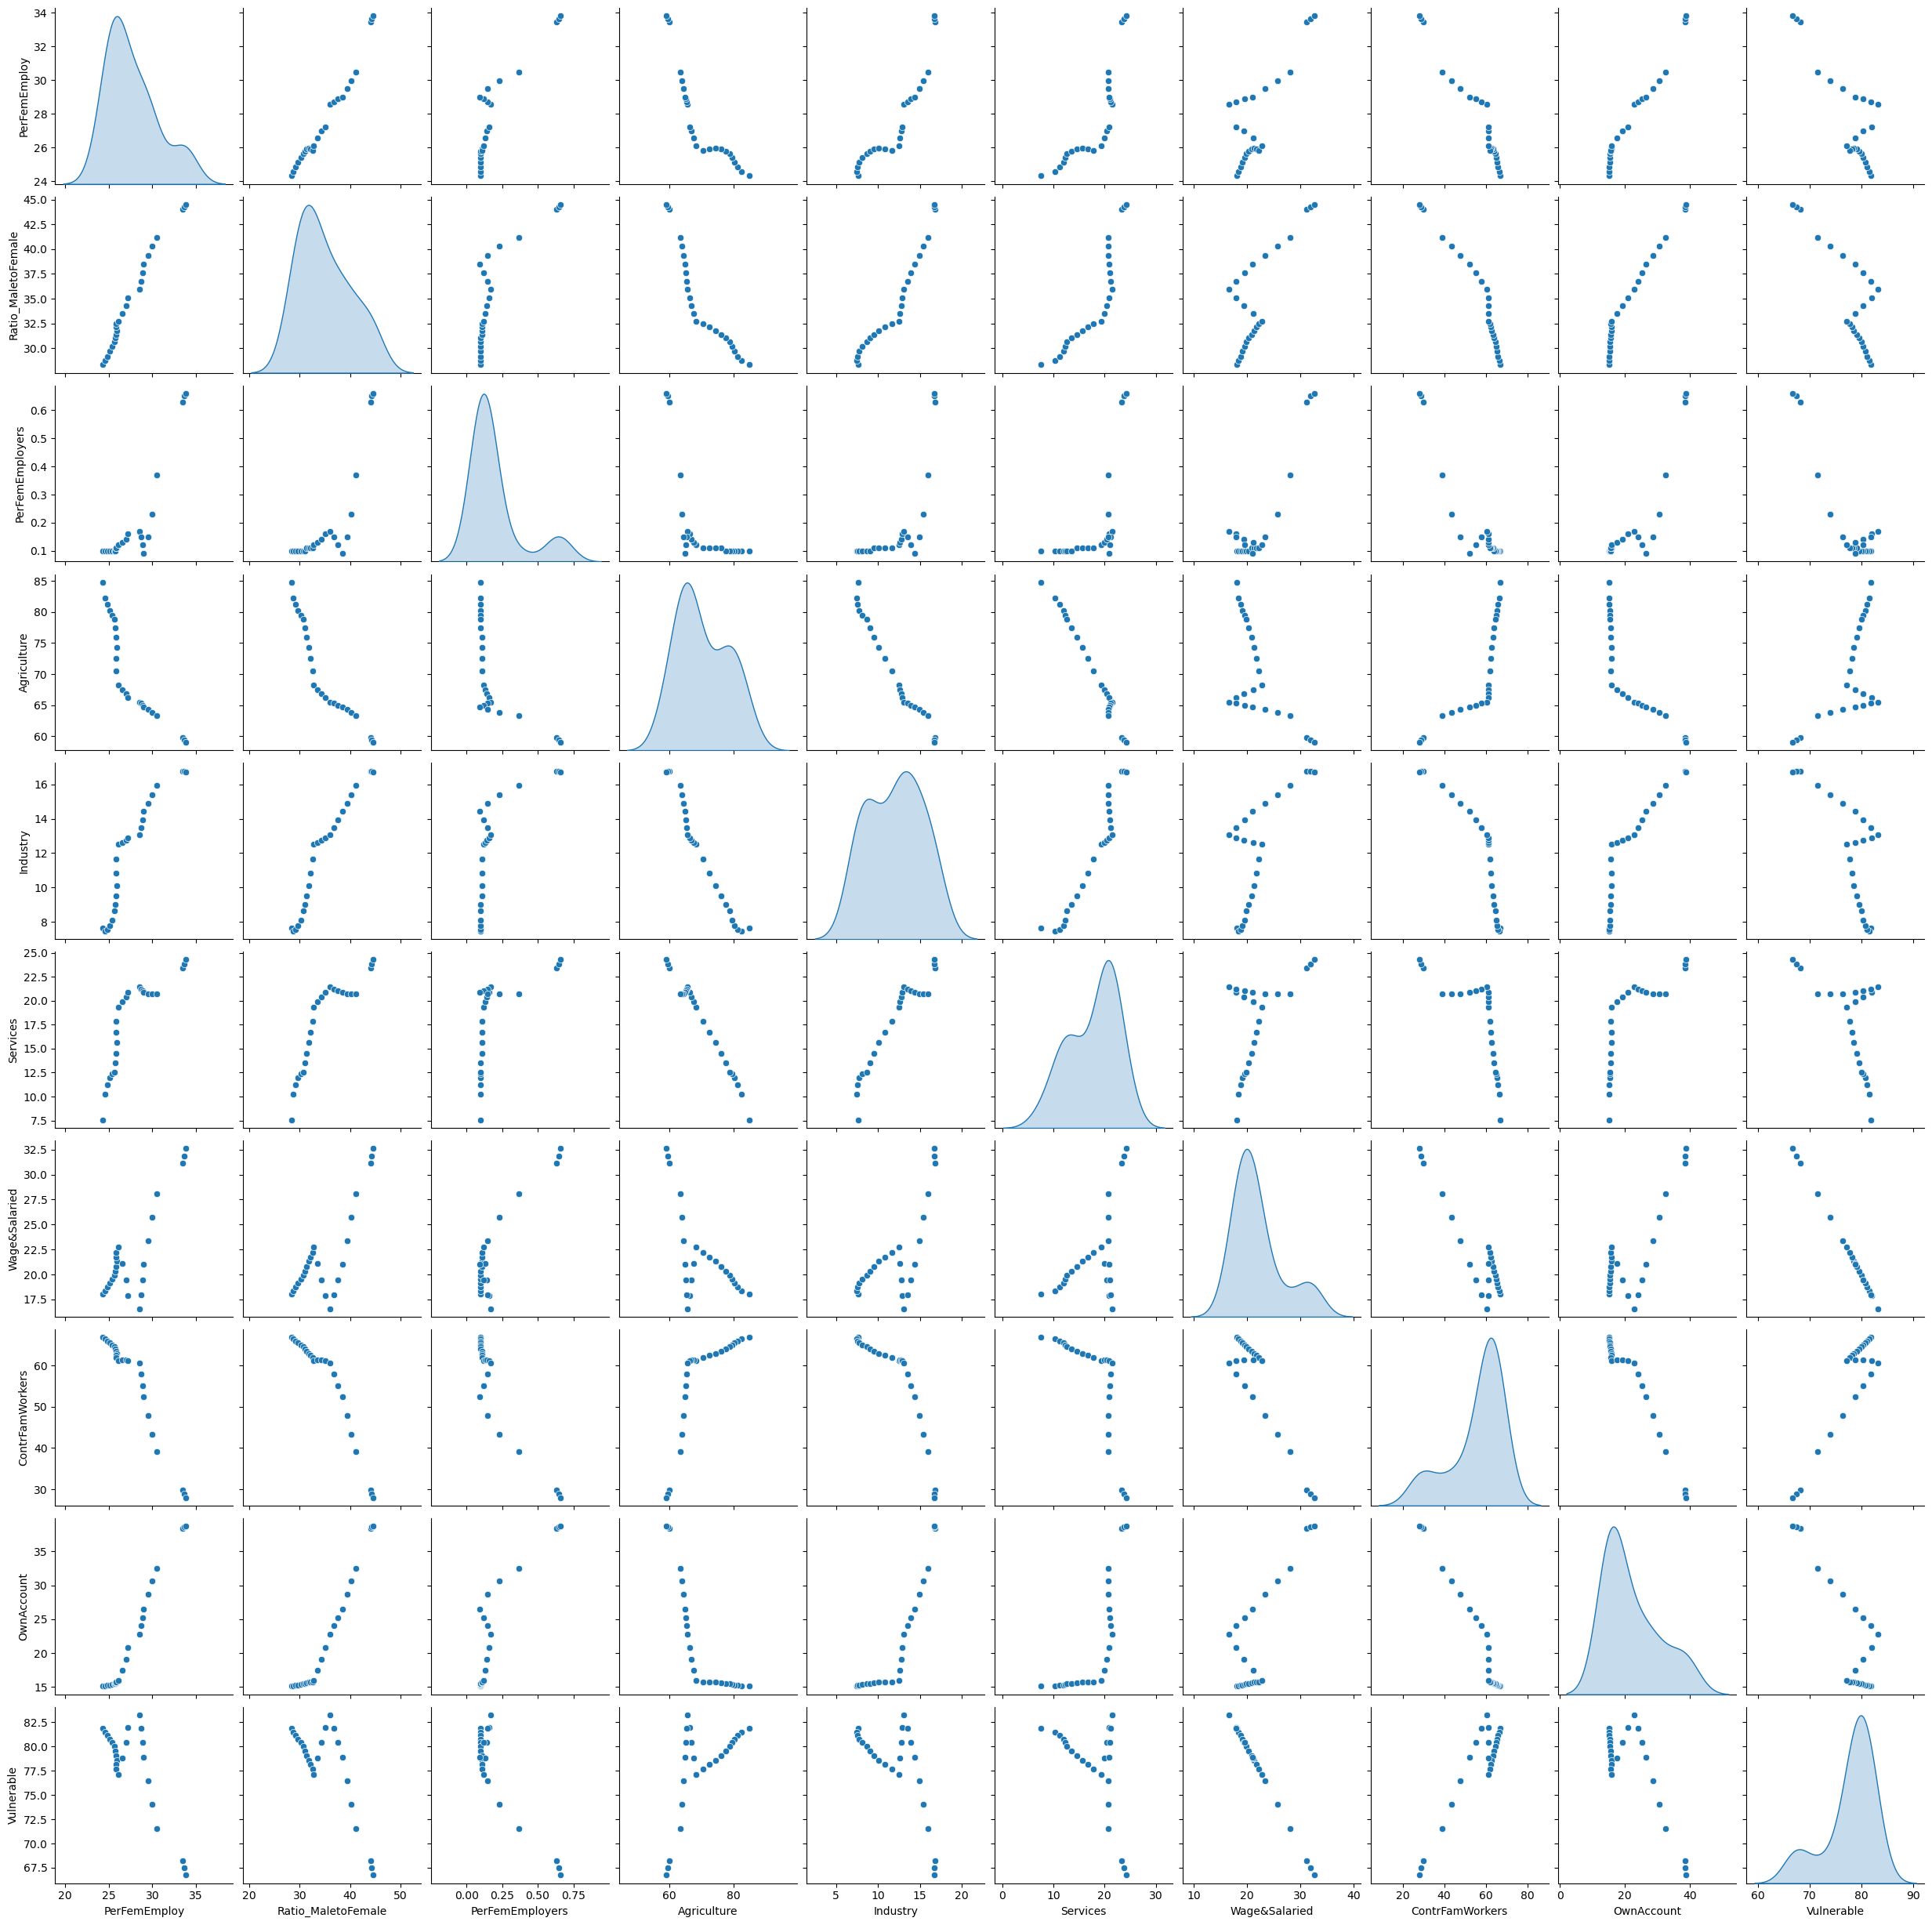

In [17]:
numeric_columns = [
    'PerFemEmploy', 'FertilityRate', 'Ratio_MaletoFemale', 
    'PerFemEmployers', 'Agriculture', 'Industry', 
    'Services', 'Wage&Salaried', 'ContrFamWorkers', 
    'OwnAccount', 'Vulnerable'
]

# Plot histograms for numeric columns
data[numeric_columns].hist(bins=20, figsize=(16, 10))
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.show()

# Pair plot to visualize relationships between numeric columns
sns.pairplot(data[numeric_columns], diag_kind='kde')
plt.show()

## 4: Preprocessing

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the target column based on your dataset
target_column = 'PerFemEmploy'  # Update with the correct target column name

# Define the numeric columns
numeric_columns = [
    'PerFemEmploy', 'FertilityRate', 'Ratio_MaletoFemale',
    'PerFemEmployers', 'Agriculture', 'Industry',
    'Services', 'Wage&Salaried', 'ContrFamWorkers',
    'OwnAccount', 'Vulnerable'
]

# Ensure all numeric columns have valid numeric values
for col in numeric_columns:
    if col in data.columns:
        # Convert to numeric, setting invalid values to NaN
        data[col] = pd.to_numeric(data[col], errors='coerce')
        # Fill NaN with column mean
        data[col] = data[col].fillna(data[col].mean())

# Standardize the numeric columns
numeric_columns = [col for col in numeric_columns if col in data.columns]

if numeric_columns:
    scaler = StandardScaler()
    data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
    print(f"Scaled numeric columns: {numeric_columns}")

# Define feature matrix X and target variable y
if target_column in data.columns:
    X = data.drop(columns=[target_column])
    y = data[target_column]
    print("Feature matrix X and target variable y successfully defined.")
else:
    print(f"Target column '{target_column}' does not exist.")

# Split the data into training and testing sets
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Data successfully split into training and testing sets.")
except NameError:
    print("Error: Ensure X and y are defined before splitting.")


Scaled numeric columns: ['PerFemEmploy', 'FertilityRate', 'Ratio_MaletoFemale', 'PerFemEmployers', 'Agriculture', 'Industry', 'Services', 'Wage&Salaried', 'ContrFamWorkers', 'OwnAccount', 'Vulnerable']
Feature matrix X and target variable y successfully defined.
Data successfully split into training and testing sets.


##  5: Model Selection and Training

In [21]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

## 6: Model Evaluation

We evaluate both models using **Root Mean Squared Error (RMSE)** and $ R^2 $ (coefficient of determination) on the test set.

The formula for $ R^2 $ is:

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

Where:
- $ y_i $ are the actual values
- $ \hat{y}_i $ are the predicted values
- $ \bar{y} $ is the mean of the actual values

The RMSE is computed as:

$$
\text{RMSE} = \sqrt{\frac{\sum (y_i - \hat{y}_i)^2}{n}}
$$


In [22]:
from sklearn.metrics import root_mean_squared_error, r2_score

# Linear Regression Evaluation
y_pred_lr = lr_model.predict(X_test)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)  # Updated function
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R^2:", r2_lr)

# Random Forest Evaluation
y_pred_rf = rf_model.predict(X_test)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf) 
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R^2:", r2_rf)


Linear Regression RMSE: 0.14035374759814226
Linear Regression R^2: 0.9857311496794231
Random Forest RMSE: 0.16417977742594217
Random Forest R^2: 0.9804754838172316


## 7: Visualizing Results
Visualize predictions vs. actual values for each model.

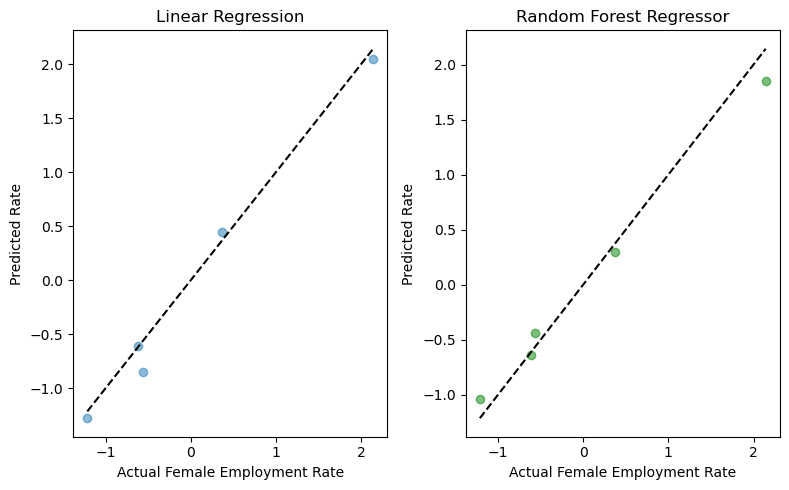

In [23]:
# Scatter plot of actual vs predicted values for both models
plt.figure(figsize=(8, 5))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual Female Employment Rate")
plt.ylabel("Predicted Rate")
plt.title("Linear Regression")

# Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual Female Employment Rate")
plt.ylabel("Predicted Rate")
plt.title("Random Forest Regressor")

plt.tight_layout()
plt.show()


##  8: Feature Importance (for Random Forest)
Analyze feature importance to interpret influential factors.

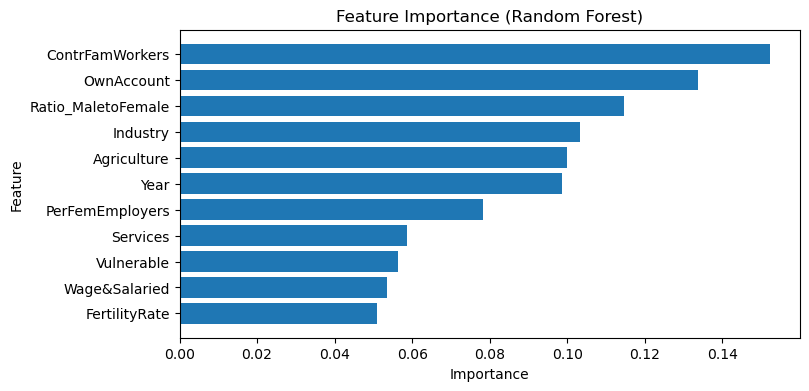

In [24]:
# Feature Importance for Random Forest
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 4))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()
